In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from helpers import *

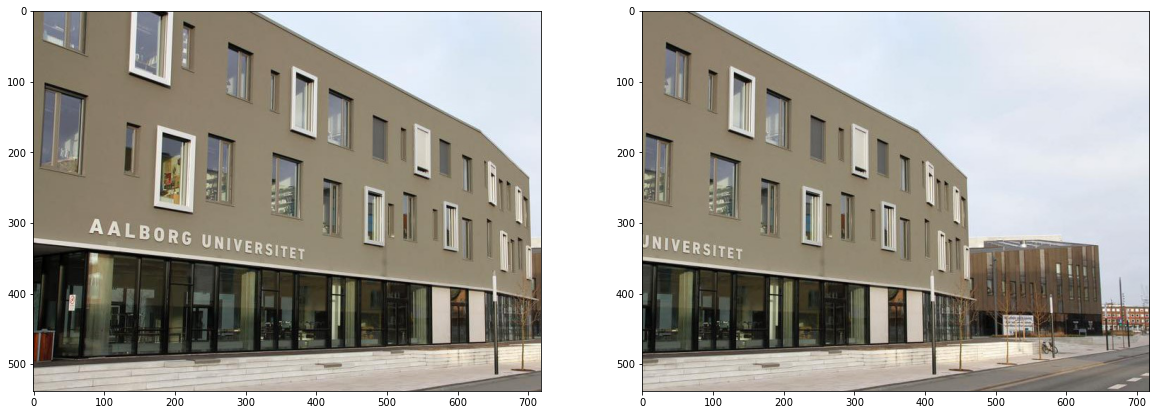

In [2]:
image1 = cv2.imread('../Images/aau-city-1.jpg')
image2 = cv2.imread('../Images/aau-city-2.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(image1)
ax[1].imshow(image2)

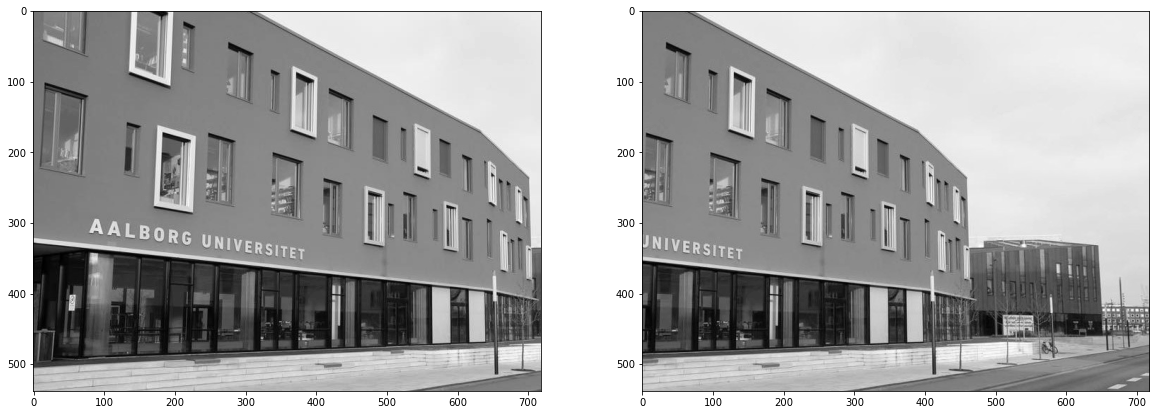

In [3]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(image1_gray, cmap='gray')
ax[1].imshow(image2_gray, cmap='gray')

In [4]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2_gray, None)

In [5]:
matcher = cv2.BFMatcher()

matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

good_matches = list()

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

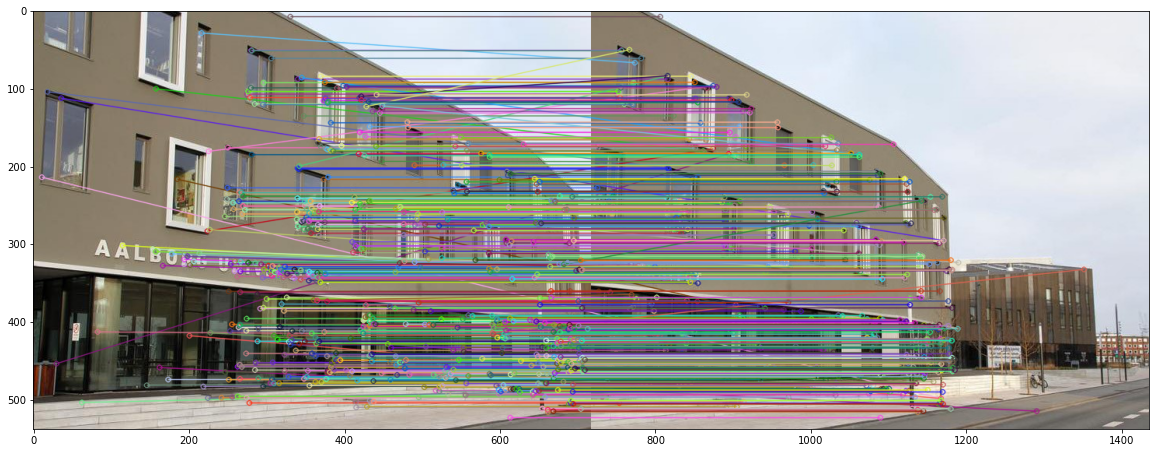

In [6]:
matches_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.imshow(matches_image)